# Data Analysis Project
- Dataset used was taken from kaggle
  
In this project:
- Load and explore data
- Data cleaning and Processing
- Correlation and Trends
- Basic regression Analysis
- compare car sigments
  
  



# Import Libraries

In [193]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

df = pd.read_csv("cars24data.csv")

# Read Data file

In [194]:
df.head()

,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
0,2017 Maruti Swift VXI,561000,2017,1197,No,Manual,25847,2,Petrol,6,2
1,2016 Maruti Baleno DELTA PETROL 1.2,498000,2016,1197,Yes,Manual,55511,2,Petrol,12,1
2,2020 Maruti Swift VXI,577000,2020,1197,No,Manual,47110,1,Petrol,4,2
3,2022 Maruti Ertiga VXI AT SHVS,1084000,2022,1462,Yes,Automatic,35378,1,Petrol,2,3
4,2019 Maruti Dzire VXI,603000,2019,1197,Yes,Manual,91856,1,Petrol,3,2


In [195]:
df.shape

(1445, 11)

In [196]:
df.dtypes

Model Name            object
Price                  int64
Manufacturing_year     int64
Engine capacity        int64
Spare key             object
Transmission          object
KM driven              int64
Ownership              int64
Fuel type             object
Imperfections          int64
Repainted Parts        int64
dtype: object

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Model Name          1445 non-null   object
 1   Price               1445 non-null   int64 
 2   Manufacturing_year  1445 non-null   int64 
 3   Engine capacity     1445 non-null   int64 
 4   Spare key           1445 non-null   object
 5   Transmission        1445 non-null   object
 6   KM driven           1445 non-null   int64 
 7   Ownership           1445 non-null   int64 
 8   Fuel type           1445 non-null   object
 9   Imperfections       1445 non-null   int64 
 10  Repainted Parts     1445 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 124.3+ KB


In [198]:
df.describe()

,Price,Manufacturing_year,Engine capacity,KM driven,Ownership,Imperfections,Repainted Parts
count,1.445000e+03,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,5.263543e+05,2017.817301,1142.104498,50588.903114,1.285121,9.597232,3.228374
std,1.963696e+05,2.986554,169.020818,27339.562631,0.489877,8.398637,3.364578
min,1.390000e+05,2010.000000,796.000000,1207.000000,1.000000,0.000000,0.000000
25%,3.900000e+05,2016.000000,998.000000,28803.000000,1.000000,3.000000,0.000000
50%,5.010000e+05,2018.000000,1197.000000,47849.000000,1.000000,8.000000,2.000000
75%,6.310000e+05,2020.000000,1197.000000,70337.000000,2.000000,14.000000,5.000000
max,1.599000e+06,2023.000000,1462.000000,124716.000000,3.000000,43.000000,27.000000


# Cleaning the data

In [199]:
df[df.duplicated() == True]

,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts


In [200]:
df.isna().sum()

Model Name            0
Price                 0
Manufacturing_year    0
Engine capacity       0
Spare key             0
Transmission          0
KM driven             0
Ownership             0
Fuel type             0
Imperfections         0
Repainted Parts       0
dtype: int64

In [201]:
df = df.rename(columns = { 'Model Name' : 'model_name', 'Price' : 'price', 'Manufacturing_year' : 'manufacturing_year',
                          'Engine capacity' : 'engine_capacity', 'Spare key' : 'spare_key', 'Transmission' : 'transmission',
                          'KM driven' : 'mileage', 'Ownership' : 'ownership', 'Fuel type' : 'fuel_type', 'Imperfections' : 'imperfections',
                          'Repainted Parts' : 'repainted_parts'})

In [202]:
df.head()

,model_name,price,manufacturing_year,engine_capacity,spare_key,transmission,mileage,ownership,fuel_type,imperfections,repainted_parts
0,2017 Maruti Swift VXI,561000,2017,1197,No,Manual,25847,2,Petrol,6,2
1,2016 Maruti Baleno DELTA PETROL 1.2,498000,2016,1197,Yes,Manual,55511,2,Petrol,12,1
2,2020 Maruti Swift VXI,577000,2020,1197,No,Manual,47110,1,Petrol,4,2
3,2022 Maruti Ertiga VXI AT SHVS,1084000,2022,1462,Yes,Automatic,35378,1,Petrol,2,3
4,2019 Maruti Dzire VXI,603000,2019,1197,Yes,Manual,91856,1,Petrol,3,2


# Exploratory Data Analysis

# Plots

C:\Users\marko\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Price_Distr_Of_Used_Cars')

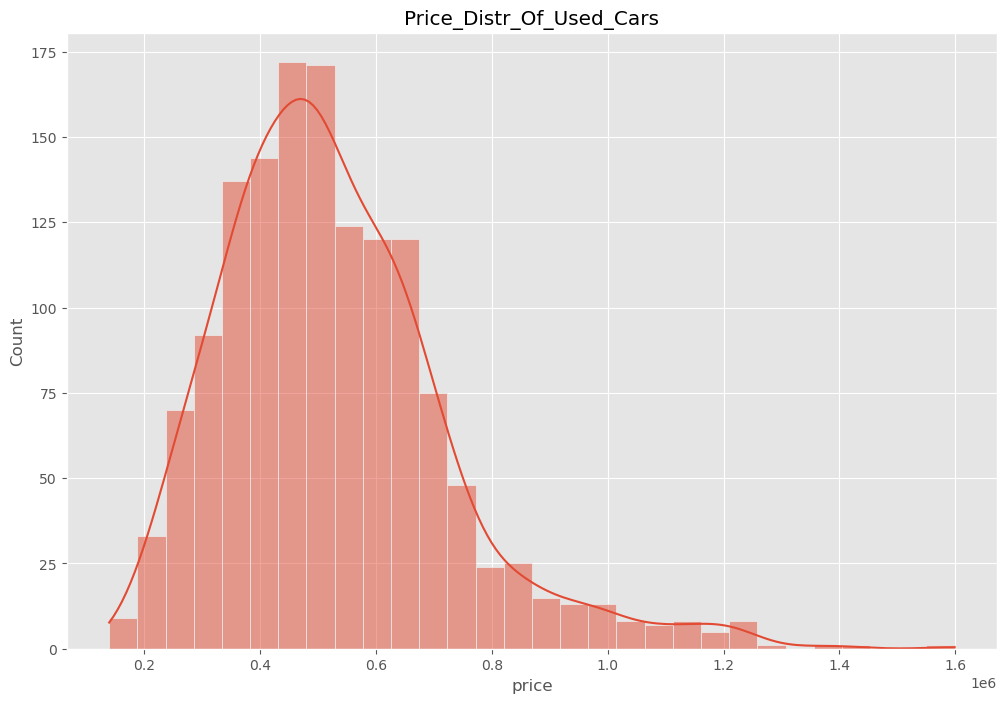

In [203]:
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price_Distr_Of_Used_Cars')

In [204]:
# Top 10 Most Listed Car Brands


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2015 Maruti Wagon R 1.0 VXI'),
  Text(1, 0, '2021 Maruti Baleno DELTA PETROL 1.2'),
  Text(2, 0, '2016 Maruti Swift VXI'),
  Text(3, 0, '2014 Maruti Swift VXI'),
  Text(4, 0, '2017 Maruti Baleno DELTA PETROL 1.2'),
  Text(5, 0, '2017 Maruti Baleno ALPHA PETROL 1.2'),
  Text(6, 0, '2016 Maruti Baleno DELTA PETROL 1.2'),
  Text(7, 0, '2017 Maruti Wagon R 1.0 VXI'),
  Text(8, 0, '2017 Maruti Baleno ZETA PETROL 1.2'),
  Text(9, 0, '2014 Maruti Wagon R 1.0 VXI')])

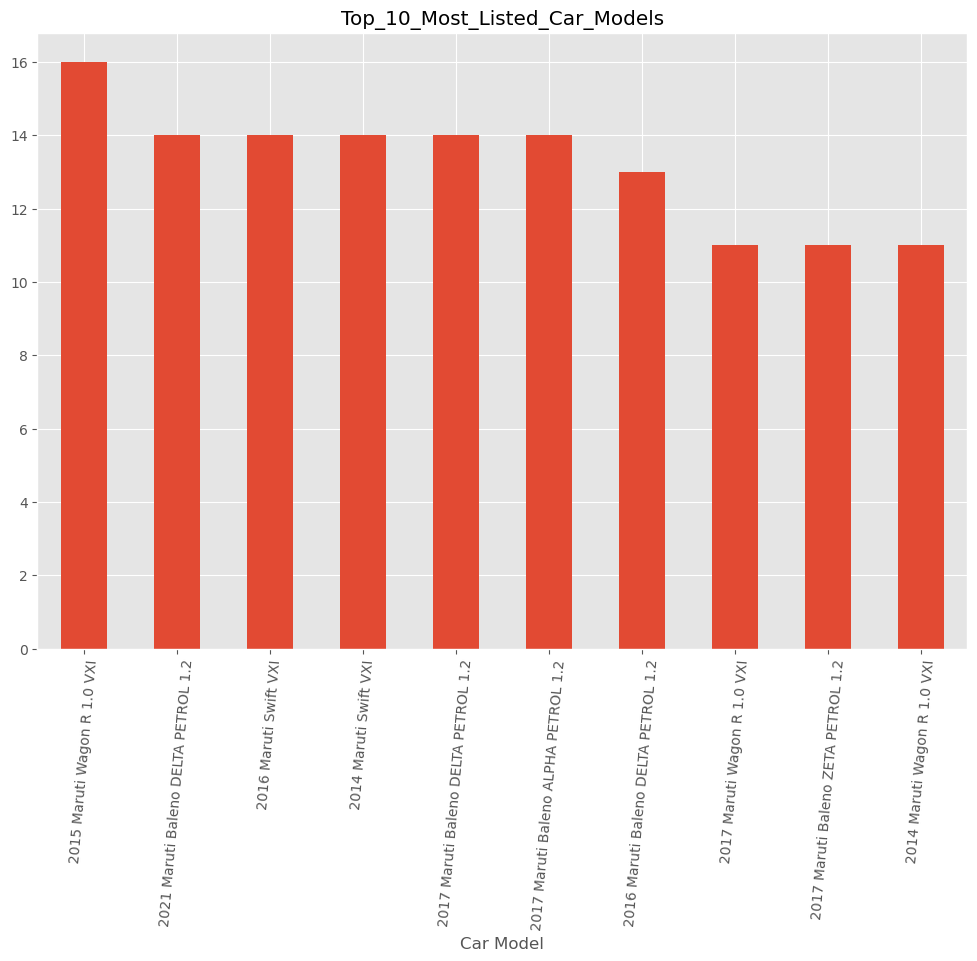

In [205]:
#plt.figure(figsize=(10,5))
df['model_name'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top_10_Most_Listed_Car_Models')
plt.xlabel('Car Model')
plt.xticks(rotation= 85)

# Transmission type

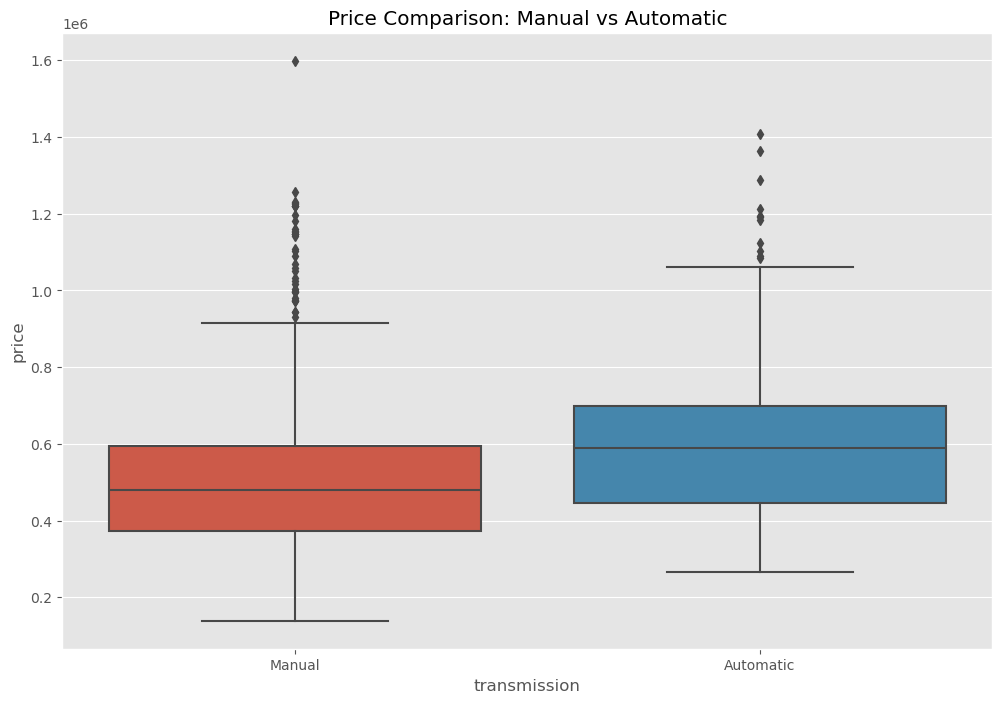

In [206]:
# lets compare the transmission types

sns.boxplot(x = df['transmission'], y=df['price'])
plt.title('Price Comparison: Manual vs Automatic')
plt.show()

# Correlation Analysis & Plots

Checking how other features are correlated with the Price.

In [207]:
df.sample(3)

,model_name,price,manufacturing_year,engine_capacity,spare_key,transmission,mileage,ownership,fuel_type,imperfections,repainted_parts
79,2016 Maruti Celerio VXI AMT,385000,2016,998,No,Automatic,32899,2,Petrol,25,8
10,2016 Maruti Swift ZXI,526000,2016,1197,Yes,Manual,77053,1,Petrol,4,4
1079,2017 Maruti IGNIS ZETA 1.2 AMT,465000,2017,1197,No,Automatic,95525,2,Petrol,3,5


Text(0.5, 1.0, 'Price Vs. Mileage')

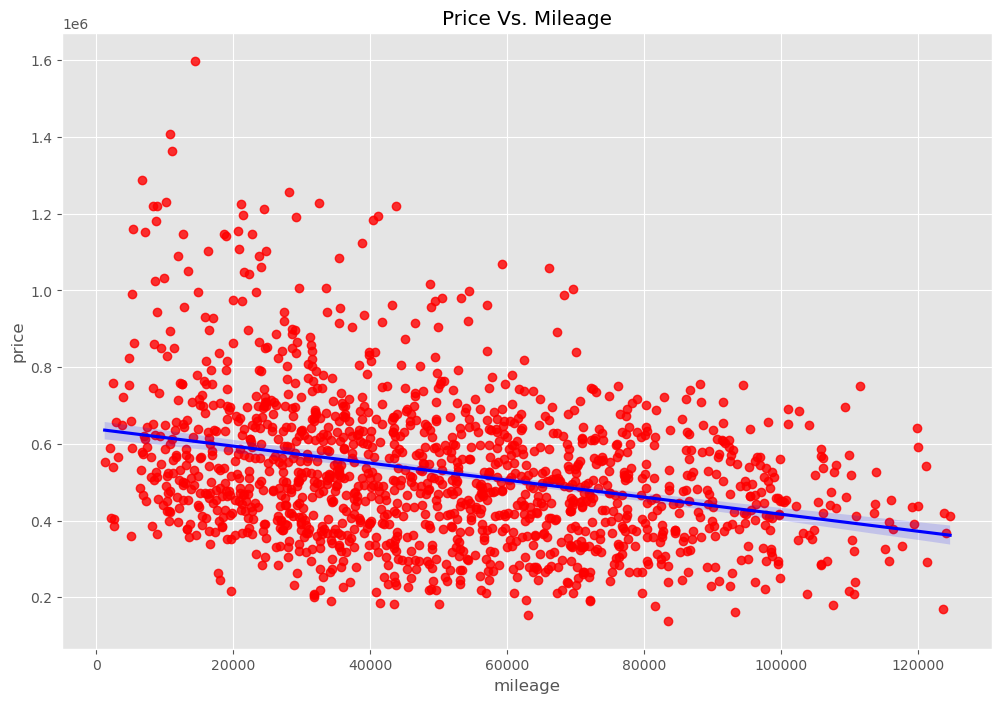

In [208]:
# regplot of price vs mileage

sns.regplot(x ='mileage', y ='price', data = df, scatter_kws={"color":"Red"}, line_kws={"color":"Blue"})
plt.title('Price Vs. Mileage')

In [209]:
# it is evident that the correlation of price and mileage is negative.
# lets cont. to find the correlation

# Correlation Matrix

In [210]:
numeric_cols = df.select_dtypes(include=['number'])

numeric_cols.corr(method='pearson')

,price,manufacturing_year,engine_capacity,mileage,ownership,imperfections,repainted_parts
price,1.000000,0.615077,0.718906,-0.308925,-0.193696,-0.245968,-0.207350
manufacturing_year,0.615077,1.000000,0.128797,-0.529817,-0.217609,-0.326156,-0.256837
engine_capacity,0.718906,0.128797,1.000000,0.017436,-0.075150,-0.034947,-0.015830
mileage,-0.308925,-0.529817,0.017436,1.000000,0.183771,0.266018,0.249148
ownership,-0.193696,-0.217609,-0.075150,0.183771,1.000000,0.039040,0.066348
imperfections,-0.245968,-0.326156,-0.034947,0.266018,0.039040,1.000000,0.426276
repainted_parts,-0.207350,-0.256837,-0.015830,0.249148,0.066348,0.426276,1.000000


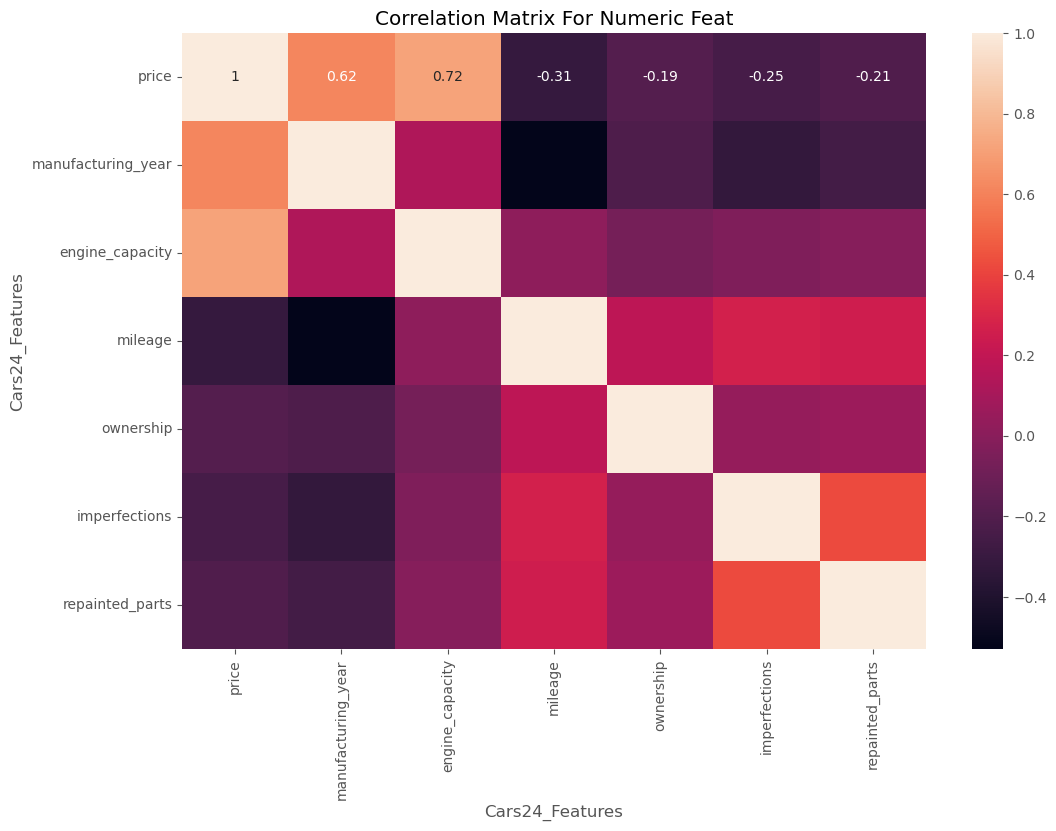

In [211]:
#Showing the heatmap for the numeric columns

corr_matrix = numeric_cols.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix For Numeric Feat')
plt.xlabel('Cars24_Features')
plt.ylabel('Cars24_Features')
plt.show()


In [212]:
# Looping each and every col that has dtype 'object'
# And change them into category and create numeric random code that matches
# for us to be able to find the correlation

df_numerized = df
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [213]:
df_numerized.head()

,model_name,price,manufacturing_year,engine_capacity,spare_key,transmission,mileage,ownership,fuel_type,imperfections,repainted_parts
0,222,561000,2017,1197,0,1,25847,2,2,6,2
1,126,498000,2016,1197,1,1,55511,2,2,12,1
2,410,577000,2020,1197,0,1,47110,1,2,4,2
3,503,1084000,2022,1462,1,0,35378,1,2,2,3
4,329,603000,2019,1197,1,1,91856,1,2,3,2


In [214]:
# Correlation of the whole dataset
#since we have numerized everything

In [215]:
df_numerized.corr(method='pearson')

,model_name,price,manufacturing_year,engine_capacity,spare_key,transmission,mileage,ownership,fuel_type,imperfections,repainted_parts
model_name,1.000000,0.611831,0.982198,0.143170,0.086477,-0.141417,-0.548418,-0.226089,0.021179,-0.325338,-0.261292
price,0.611831,1.000000,0.615077,0.718906,0.077792,-0.224915,-0.308925,-0.193696,0.041077,-0.245968,-0.207350
manufacturing_year,0.982198,0.615077,1.000000,0.128797,0.093485,-0.159560,-0.529817,-0.217609,0.031583,-0.326156,-0.256837
engine_capacity,0.143170,0.718906,0.128797,1.000000,0.065671,-0.082148,0.017436,-0.075150,0.111192,-0.034947,-0.015830
spare_key,0.086477,0.077792,0.093485,0.065671,1.000000,-0.059760,-0.040629,-0.087410,-0.050750,-0.041669,-0.038475
transmission,-0.141417,-0.224915,-0.159560,-0.082148,-0.059760,1.000000,0.064830,-0.028879,-0.180594,0.070541,0.053156
mileage,-0.548418,-0.308925,-0.529817,0.017436,-0.040629,0.064830,1.000000,0.183771,-0.212170,0.266018,0.249148
ownership,-0.226089,-0.193696,-0.217609,-0.075150,-0.087410,-0.028879,0.183771,1.000000,-0.013462,0.039040,0.066348
fuel_type,0.021179,0.041077,0.031583,0.111192,-0.050750,-0.180594,-0.212170,-0.013462,1.000000,0.005052,0.002297
imperfections,-0.325338,-0.245968,-0.326156,-0.034947,-0.041669,0.070541,0.266018,0.039040,0.005052,1.000000,0.426276


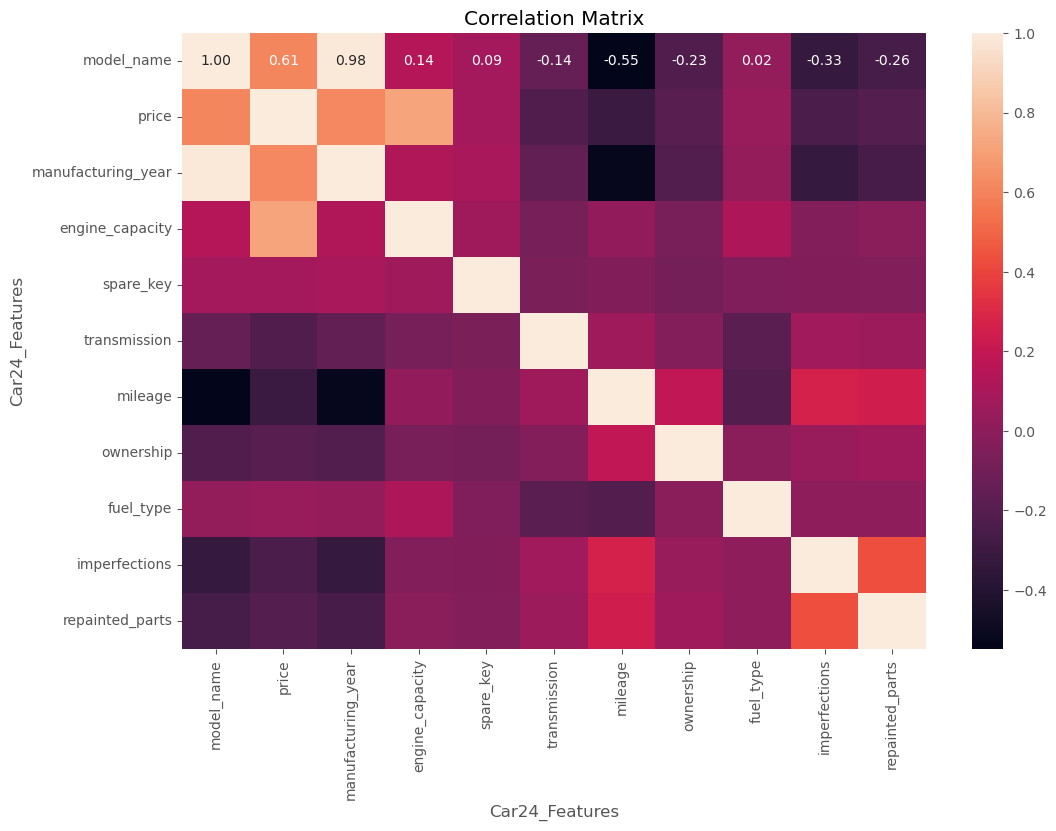

In [216]:
corr_matrix_numerized = df_numerized.corr(method='pearson')
sns.heatmap(corr_matrix_numerized, annot=True, fmt='.2f')

plt.title('Correlation Matrix')
plt.xlabel('Car24_Features')
plt.ylabel('Car24_Features')
plt.show()

In [217]:
# Filtering for Price
df_numerized.corr()['price']

model_name            0.611831
price                 1.000000
manufacturing_year    0.615077
engine_capacity       0.718906
spare_key             0.077792
transmission         -0.224915
mileage              -0.308925
ownership            -0.193696
fuel_type             0.041077
imperfections        -0.245968
repainted_parts      -0.207350
Name: price, dtype: float64

# filtering the correlation

In [218]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs


model_name       model_name            1.000000
                 price                 0.611831
                 manufacturing_year    0.982198
                 engine_capacity       0.143170
                 spare_key             0.086477
                                         ...   
repainted_parts  mileage               0.249148
                 ownership             0.066348
                 fuel_type             0.002297
                 imperfections         0.426276
                 repainted_parts       1.000000
Length: 121, dtype: float64

In [219]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

mileage             model_name           -0.548418
model_name          mileage              -0.548418
manufacturing_year  mileage              -0.529817
mileage             manufacturing_year   -0.529817
manufacturing_year  imperfections        -0.326156
                                            ...   
engine_capacity     engine_capacity       1.000000
manufacturing_year  manufacturing_year    1.000000
price               price                 1.000000
imperfections       imperfections         1.000000
repainted_parts     repainted_parts       1.000000
Length: 121, dtype: float64

In [220]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

model_name          price                 0.611831
price               model_name            0.611831
manufacturing_year  price                 0.615077
price               manufacturing_year    0.615077
                    engine_capacity       0.718906
engine_capacity     price                 0.718906
manufacturing_year  model_name            0.982198
model_name          manufacturing_year    0.982198
                    model_name            1.000000
transmission        transmission          1.000000
fuel_type           fuel_type             1.000000
ownership           ownership             1.000000
mileage             mileage               1.000000
spare_key           spare_key             1.000000
engine_capacity     engine_capacity       1.000000
manufacturing_year  manufacturing_year    1.000000
price               price                 1.000000
imperfections       imperfections         1.000000
repainted_parts     repainted_parts       1.000000
dtype: float64

# Insghts
- We discovered that *mileage* vs *price* are negatively correlated, meaning the higher the mileage the lower the price.
- We also discovered the positive correlation between the price and the engine capacity...
- if the car company invest more on their engine quality that might increase their profits and even the car demand.
- Automatic cars tends to be more expensive than the maunal ones.
- Manual cars shows wider price variation, while automatic cars are more clustered around their median
